In [52]:
from statsmodels.sandbox import distributions
import pandas as pd
import numpy  as np
import yfinance as yf


data = pd.read_csv('mpd_stats.csv')
data.head()

,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
0,bac,1/15/2010,3.0,-0.02514,0.18210,-0.38173,0.85192,-0.25389,-0.01634,0.19272,-20.0,0.14898,20.0,0.09307
1,bac,1/29/2010,3.0,-0.02194,0.21265,-0.79513,1.61552,-0.28826,0.00001,0.21786,-20.0,0.16750,20.0,0.12009
2,bac,2/12/2010,3.0,-0.01699,0.21625,-0.86181,1.83248,-0.28670,0.00720,0.22358,-20.0,0.16404,20.0,0.12713
3,bac,2/26/2010,3.0,-0.00965,0.17893,-0.70108,1.40641,-0.23570,0.00776,0.19373,-20.0,0.12882,20.0,0.09233
4,bac,3/15/2010,3.0,0.00006,0.17357,-0.71889,1.63480,-0.21657,0.01649,0.19608,-20.0,0.11325,20.0,0.09545


In [53]:
data['maturity_target'] = data['maturity_target'].ffill()

In [54]:
sets = data.groupby(['market']).indices
for i in sets:
    maturity = data.loc[data['market']==i].groupby(['maturity_target']).indices
    for m in maturity:
        result = data.loc[(data['market']==i) & (data['maturity_target']==m)]
        result.to_csv(f'data/{i}_{int(m)}.csv')

In [55]:
start, end = "2000-01-01", "2024-02-02"
silver = yf.download("SI=F", start=start, end=end, progress= False)
silver.to_csv("data/silver.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:SI=F: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/SI=F?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:SI=F: yfinance received OHLC data: 2000-08-30 04:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df

In [56]:
bac = yf.download("BAC", start=start, end=end, progress= False)
bac.to_csv("data/bac.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:BAC: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/BAC?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:BAC: yfinance received OHLC data: 2000-01-03 14:30:00 -> 2024-02-01 14:30:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.in

In [57]:
citi = yf.download("C", start=start, end=end, progress= False)
citi.to_csv("data/citi.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:C: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/C?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:C: yfinance received OHLC data: 2000-01-03 14:30:00 -> 2024-02-01 14:30:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index +=

In [58]:
corn = yf.download("ZC=F", start=start, end=end, progress= False)
corn.to_csv("data/corn.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:ZC=F: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/ZC=F?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:ZC=F: yfinance received OHLC data: 2000-07-17 04:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df

In [59]:
euro = yf.download("EURUSD=X", start=start, end=end, progress= False)
euro.to_csv("data/euro.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:EURUSD=X: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00+00:00', 'period2': '2024-02-02 00:00:00+00:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/EURUSD=X?period1=946684800&period2=1706832000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:EURUSD=X: yfinance received OHLC data: 2003-12-01 00:00:00 -> 2024-02-01 00:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta i

In [60]:
gold = yf.download("GC=F", start=start, end=end, progress= False)
gold.to_csv("data/gold.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:GC=F: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/GC=F?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:GC=F: yfinance received OHLC data: 2000-08-30 04:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df

In [61]:
iyr = yf.download("IYR", start=start, end=end, progress= False)
iyr.to_csv("data/iyr.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:IYR: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/IYR?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:IYR: yfinance received OHLC data: 2000-06-19 13:30:00 -> 2024-02-01 14:30:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.in

In [62]:
oil = yf.download("CL=F", start=start, end=end, progress= False)
oil.to_csv("data/oil.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:CL=F: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/CL=F?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:CL=F: yfinance received OHLC data: 2000-08-23 04:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df

In [63]:
pound = yf.download("GBPUSD=X", start=start, end=end, progress= False)
pound.to_csv("data/pound.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:GBPUSD=X: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00+00:00', 'period2': '2024-02-02 00:00:00+00:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/GBPUSD=X?period1=946684800&period2=1706832000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:GBPUSD=X: yfinance received OHLC data: 2003-12-01 00:00:00 -> 2024-02-01 00:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta i

In [64]:
soybns = yf.download("ZS=F", start=start, end=end, progress= False)
soybns.to_csv("data/soybns.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:ZS=F: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/ZS=F?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:ZS=F: yfinance received OHLC data: 2000-09-15 04:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df

In [65]:
tr5yr = yf.download("^FVX", start=start, end=end, progress= False)
tr5yr.to_csv("data/tr5yr.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:^FVX: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/%5EFVX?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:^FVX: yfinance received OHLC data: 2000-01-03 05:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  

In [66]:
tr10yr = yf.download("^TNX", start=start, end=end, progress= False)
tr10yr.to_csv("data/tr10yr.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:^TNX: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/%5ETNX?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:^TNX: yfinance received OHLC data: 2000-01-03 05:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  

In [67]:
wheat = yf.download("ZW=F", start=start, end=end, progress= False)
wheat.to_csv("data/wheat.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:ZW=F: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/ZW=F?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:ZW=F: yfinance received OHLC data: 2000-07-17 04:00:00 -> 2024-02-01 05:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df

In [68]:
yen = yf.download("JPY=X", start=start, end=end, progress= False)
yen.to_csv("data/yen.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:JPY=X: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00+00:00', 'period2': '2024-02-02 00:00:00+00:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/JPY=X?period1=946684800&period2=1706832000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:JPY=X: yfinance received OHLC data: 2000-01-03 00:00:00 -> 2024-02-02 00:00:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
 

In [69]:
sp500 = yf.download("^SPX", start=start, end=end, progress= False)
sp500.to_csv("data/sp.csv")

DEBUG:yfinance:Entering download()
DEBUG:yfinance:Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Entering history()
DEBUG:yfinance:^SPX: Yahoo GET parameters: {'period1': '2000-01-01 00:00:00-05:00', 'period2': '2024-02-02 00:00:00-05:00', 'interval': '1d', 'includePrePost': False, 'events': 'div,splits,capitalGains'}
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/%5ESPX?period1=946702800&period2=1706850000&interval=1d&includePrePost=False&events=div%2Csplits%2CcapitalGains HTTP/1.1" 200 None
DEBUG:yfinance:^SPX: yfinance received OHLC data: 2000-01-03 14:30:00 -> 2024-02-01 14:30:00
c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  

In [3]:
import pandas as pd
import numpy as np
from utils import *
from math import sqrt

sp500 = pd.read_csv("data/sp.csv", index_col=0)
sp500.index = pd.to_datetime(sp500.index)
sp500.head()

c:\Users\Zaichuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\py_lets_be_rational\numba_helper.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return jit(*jit_args, **jit_kwargs)(fun)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [4]:
sp500["return"] = (sp500["Adj Close"].shift(periods=-1)/sp500["Adj Close"]).apply(np.log)
sp500["return_6m"] = (sp500["Adj Close"].shift(periods=-21*6)/sp500["Adj Close"]).apply(np.log)
sp500["vol_20d"] = sp500["return"].rolling(window=20).std()*sqrt(252)
sp500["vol_30d"] = sp500["return"].rolling(window=30).std()*sqrt(252)
sp500["vol_1y"] = sp500["return"].rolling(window=252).std()*sqrt(252)
sp500["vol_3y"] = sp500["return"].rolling(window=756).std()*sqrt(252)
sp500 = sp500.dropna()
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume,return,return_6m,vol_20d,vol_30d,vol_1y,vol_3y
Date,,,,,,,,,,,,
2023-07-27,4598.259766,4607.069824,4528.560059,4537.410156,4537.410156,4553210000,0.009829,0.075034,0.088942,0.096069,0.187288,0.181926
2023-07-28,4565.750000,4590.160156,4564.009766,4582.229980,4582.229980,3981010000,0.001468,0.072733,0.080496,0.090722,0.186932,0.181882
2023-07-31,4584.819824,4594.220215,4573.140137,4588.959961,4588.959961,4503600000,-0.002669,0.070665,0.081867,0.090296,0.186456,0.181761
2023-08-01,4578.830078,4584.620117,4567.529785,4576.729980,4576.729980,4042370000,-0.013936,0.057097,0.097762,0.099090,0.186979,0.181935
2023-08-02,4550.930176,4550.930176,4505.750000,4513.390137,4513.390137,4270710000,-0.002551,0.083449,0.093160,0.097923,0.186868,0.181895


In [5]:
r = pd.read_csv("data/risk_free.csv", index_col=0)
r.index = pd.to_datetime(r.index)
r["DTB3"] = r["DTB3"].replace(".", np.nan)
r["DTB3"] = r["DTB3"].ffill()
r["DTB3"] = pd.to_numeric(r["DTB3"])
r.head()

,DTB3
DATE,
1954-01-04,1.33
1954-01-05,1.28
1954-01-06,1.28
1954-01-07,1.31
1954-01-08,1.31


In [6]:
sp500 = pd.merge(sp500, r, how='left', left_index=True, right_index=True)
sp500.rename(columns={"DTB3":"risk_free_rate"}, inplace=True)
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,return,return_6m,vol_20d,vol_30d,vol_1y,vol_3y,risk_free_rate
Date,,,,,,,,,,,,,
2003-01-07,929.010010,930.809998,919.929993,922.929993,922.929993,1545200000,-0.014186,0.082409,0.215741,0.221798,0.262761,0.233770,1.17
2003-01-08,922.929993,922.929993,908.320007,909.929993,909.929993,1467600000,0.019201,0.083023,0.220739,0.229086,0.263505,0.232989,1.17
2003-01-09,909.929993,928.309998,909.929993,927.570007,927.570007,1560300000,0.000000,0.073325,0.220772,0.220268,0.263498,0.232985,1.18
2003-01-10,927.580017,932.890015,917.659973,927.570007,927.570007,1485400000,-0.001413,0.079040,0.220230,0.204773,0.263356,0.232984,1.18
2003-01-13,927.570007,935.049988,922.049988,926.260010,926.260010,1396300000,0.005813,0.077020,0.213514,0.205442,0.263382,0.232479,1.19


In [7]:
sp6m = pd.read_csv("data/sp6m_6.csv", index_col=0)
sp6m.rename(columns={"idt":"Date"}, inplace=True)
sp6m["Date"] = pd.to_datetime(sp6m["Date"])
sp6m.set_index("Date", inplace=True)
sp6m.head()

,market,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
Date,,,,,,,,,,,,,
2007-01-12,sp6m,6.0,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.03382,0.111149,-20.0,0.024242,20.0,0.001915
2007-01-31,sp6m,6.0,0.018350,0.077969,-1.046439,1.842209,-0.083769,0.03099,0.102377,-20.0,0.016758,20.0,0.000767
2007-02-15,sp6m,6.0,0.019976,0.084543,-1.001081,1.588657,-0.092096,0.03361,0.111834,-20.0,0.021096,20.0,0.001900
2007-02-28,sp6m,6.0,0.018823,0.100147,-1.031801,1.638698,-0.114332,0.03565,0.126683,-20.0,0.036788,20.0,0.007350
2007-03-15,sp6m,6.0,0.018767,0.099519,-1.058040,1.823271,-0.112902,0.03536,0.125505,-20.0,0.036138,20.0,0.007715


In [8]:
def create_bins(max_val, min_val, n_bins=1000):
    """ Create bins for the given data and return the bin edges. """
    bins = np.linspace(min_val, max_val, n_bins + 1)  # +1 for inclusive edge
    return bins

def bin_data(data, bins):
    """ Bin the data and return the count in each bin. """
    bin_counts = np.histogram(data, bins)[0]
    return bin_counts

def find_bin_count(input_value, bins, bin_counts):
    """ Find the count of the bin that the input value belongs to. """
    bin_index = np.digitize(input_value, bins) - 1  # -1 because np.digitize starts from 1
    return bin_counts[bin_index]

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Zaichuan\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Zaichuan\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(

(0.018807825540259535, 0.007370572954015451, -1.0699056556785462, 4.8816740681624) (0.018803344, 0.08643514, -1.079705261, 4.837194376)


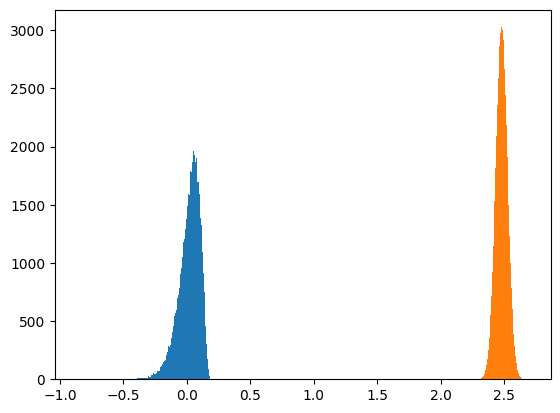

(0.01848722663914795, 0.006022211412149673, -1.0304486760773564, 4.733281749478273) (0.018349613, 0.077969269, -1.046439308, 4.842209447)


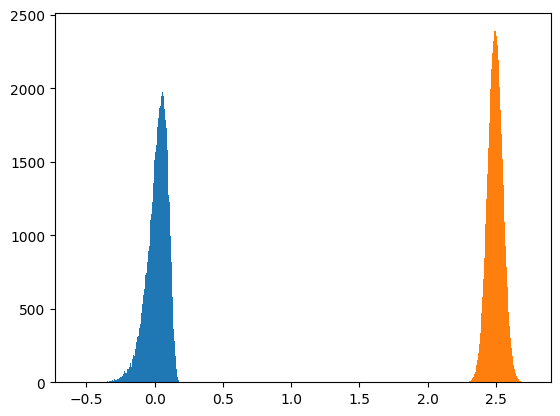

(0.02008742610060712, 0.0072141065588553896, -1.0349736052647311, 4.777243709044814) (0.019976356, 0.08454269, -1.00108081, 4.588656939)


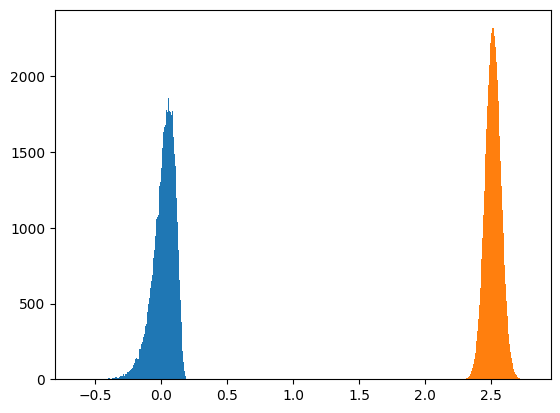

(0.0184687414446434, 0.010049749356323547, -1.0212798969777162, 4.55006056602255) (0.01882251, 0.100146527, -1.031800567, 4.638698301)


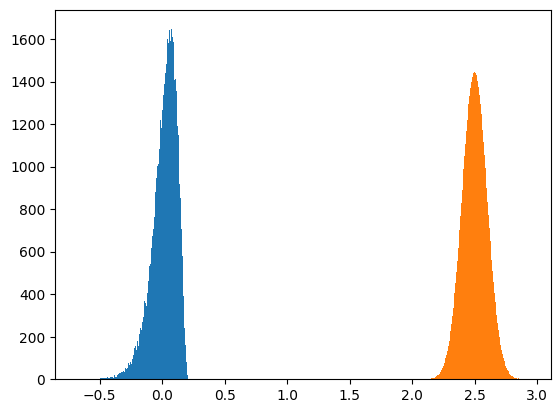

(0.018704408542422397, 0.009981938845890227, -1.0658747086584273, 4.778544818600267) (0.018766619, 0.099518806, -1.058039718, 4.8232713490000005)
Error at 2007-03-15 00:00:00
SP500 contains data: False
Simulation success: True
(0.0197366864309905, 0.00958274713099301, -1.169557912766767, 4.990391398697044) (0.01949386, 0.09820098, -1.172308409, 5.024768336)


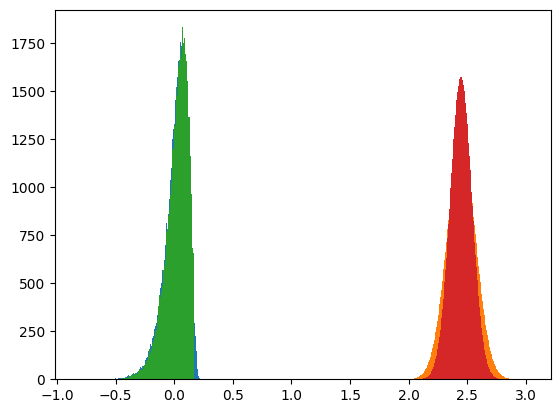

(0.020178459882544277, 0.007969597055422951, -1.2543334351376398, 5.455857054117367) (0.020003262, 0.089311938, -1.255677208, 5.4435272359999995)


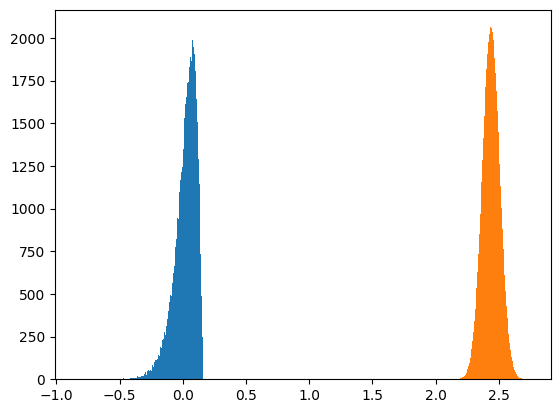

(0.01816946155475032, 0.008707052005123703, -0.9343337337258695, 4.395444206307787) (0.018067801, 0.093035986, -0.923788949, 4.360788523)


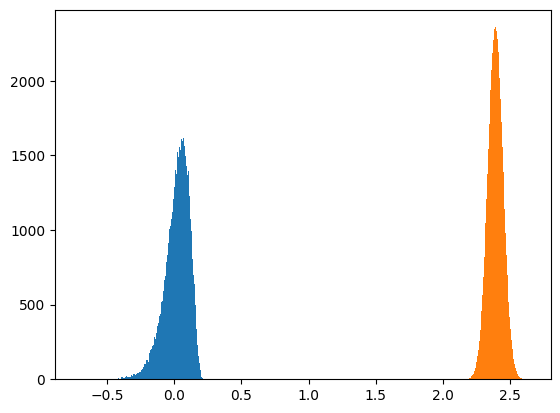

(0.019048358467218633, 0.009695438893467778, -0.9194520462815455, 4.335134517001483) (0.019525622, 0.098145715, -0.91405103, 4.323293187)


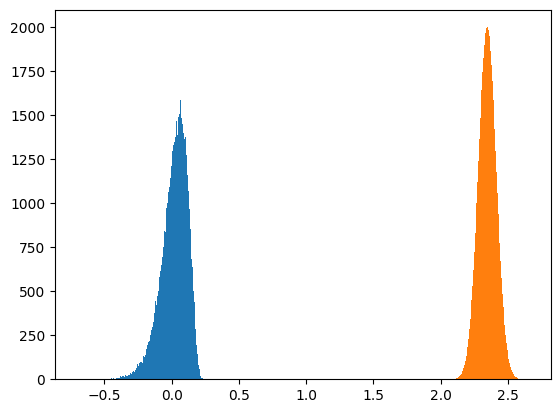

(0.01846938359647997, 0.0093151319901851, -0.9378397766628329, 4.437985647731035) (0.01851117, 0.096887682, -0.946729784, 4.455856676)


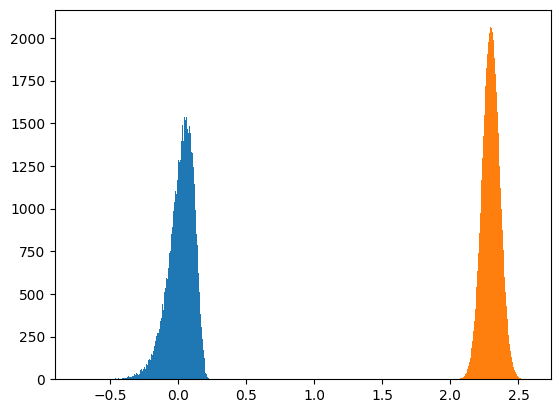

(0.017858588396685002, 0.009891135158257385, -0.943378491683083, 4.437327751660716) (0.017632964, 0.099831912, -0.953329551, 4.457672695)


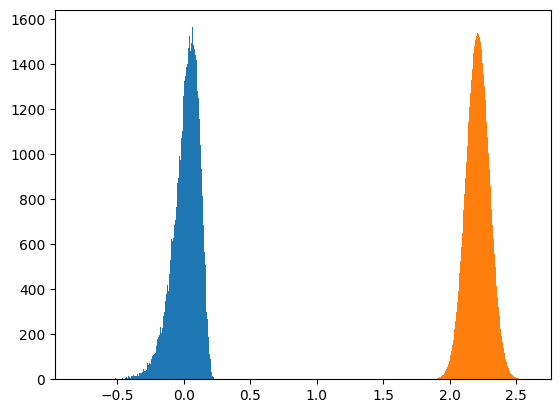

(0.018297717374790613, 0.012136789616876602, -1.0160038396530824, 4.593456826578221) (0.018018525, 0.110562027, -1.01824844, 4.605386466)


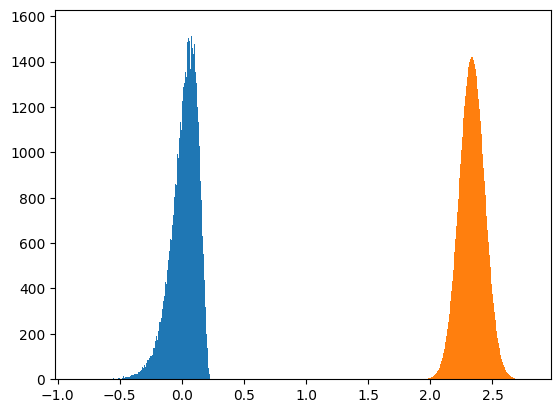

(0.01911533950344291, 0.012460786994017122, -1.0589866298692812, 4.6263204158797135) (0.019513245, 0.111052843, -1.049040148, 4.609064037)


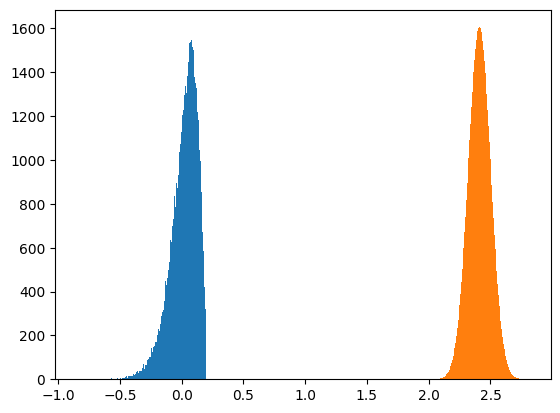

(0.01684105901527434, 0.01885088747348196, -0.8598327141746174, 4.017278327345605) (0.017407636, 0.13777295, -0.887206645, 4.161876263)


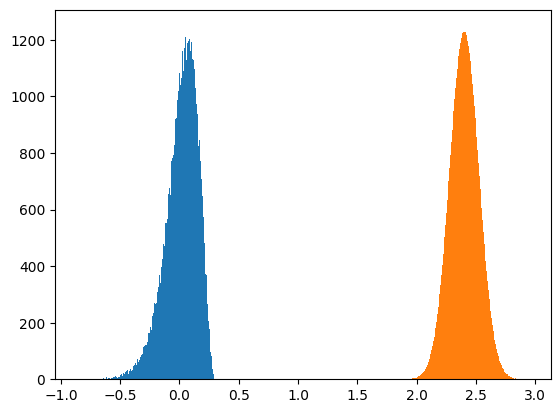

(0.011350080539940442, 0.02565984114980438, -0.9374356926471292, 4.3847887447935525) (0.011459495, 0.160131206, -0.918483988, 4.225744374)


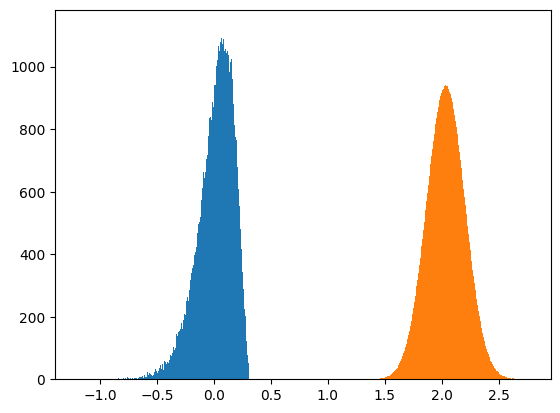

(0.013202592727684849, 0.022375020770917502, -1.0606028145156106, 4.333823192426351) (0.013267799, 0.149005878, -1.043409844, 4.272467902)


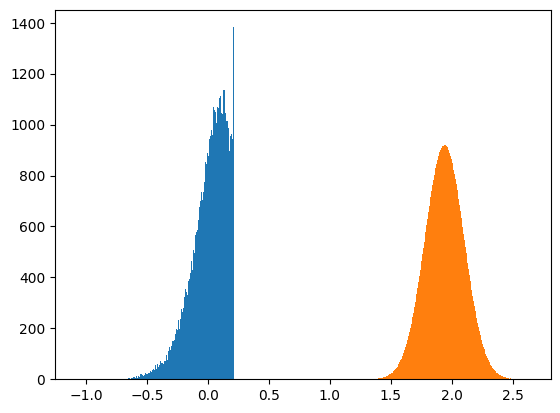

In [9]:
count = 0
for i in sp6m.index:
    rnp = sp6m.loc[i]
    mean = rnp["mu"]
    std = rnp["sd"]
    skew = rnp["skew"]
    kurt = rnp["kurt"]


    try:
        coeff = fit_fleishman_from_sk(skew, kurt)
        sim = (generate_fleishman(-coeff[1],*coeff,N=100000))*std+mean

        sp = sp500.loc[i]
        s0 = sp["Close"]
        alpha = sp["risk_free_rate"]
        sigma = sp["vol_20d"]
        true_retun = sp["return_6m"]
        T = 1/2
        Nsim = 100000
        stratified = True
        gbm = SimuStockPath(s0, alpha, sigma, T, Nsim, stratified)
        gbm = np.log(gbm/s0)

        
        bins = create_bins(max(max(sim), max(gbm)), min(min(sim), min(gbm)))

        rnp_counts = bin_data(sim, bins)
        gbm_counts = bin_data(gbm, bins)

        print(describe(sim), (mean, std, skew, kurt+3))
        plt.hist(sim, bins=bins)
        plt.hist(gbm, bins=bins)
        plt.show()
        count += find_bin_count(true_retun, bins, rnp_counts)-find_bin_count(true_retun, bins, gbm_counts)
    except:
        print(f"Error at {i}")
        print(f"SP500 contains data: {i in sp.index}")
        print(f"Simulation success: {coeff != None}")
        


print(count/100000)
